In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Phoneme Dataset
Load the phoneme dataset using Pandas

In [2]:
import re
data = pd.read_csv('data/phoneme.csv')

pd.options.mode.chained_assignment = None # Just gonna pretend we're not gettting the error...
for observation in range(len(data)):
    data['speaker'][observation] = data['speaker'][observation][0:5]

grouped = [y for _, y in data.groupby(data['speaker'])]
test = grouped[0].loc[:, data.columns.drop(['speaker','row.names'])]
train = grouped[1].loc[:, data.columns.drop(['speaker', 'row.names'])]
# Split the dataset into a train and test dataset according to column "speaker".
# Be sure to exclude row number, "speaker" and response columns from your features.

### 2. LDA modelling
Fit an LDA model. Compute and report the train and test error.

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

train_X = train.iloc[:, 0:-1]
train_y = train.iloc[:, -1]
test_X = test.iloc[:, 0:-1]
test_y = test.iloc[:, -1]

lda = LDA(n_components=1)
lda_train_fit = lda.fit_transform(train_X, train_y)
lda_test_predictions = lda.predict(test_X)

lda_train_predictions = lda.predict(train_X)

lda_train_score = lda.score(train_X, train_y)
lda_test_score = lda.score(test_X, test_y)
print("full LDA training score: ", lda_train_score)
print("full LDA training error: ~", round(100*(1 - lda_train_score)), "%", sep='')
print("full LDA test score: ", lda_test_score)
print("full LDA test error: ~", round(100*(1 - lda_test_score), 2), "%", sep='')

full LDA training score:  0.9440119760479042
full LDA training error: ~6%
full LDA test score:  0.9195893926432849
full LDA test error: ~8.04%


### 3. LDA canonical coordinates
 Plot the projection of the training data onto the first two canonical coordinates of the LDA and report your findings. Investigate the data projected on further dimensions using the \texttt{dimen} parameter.

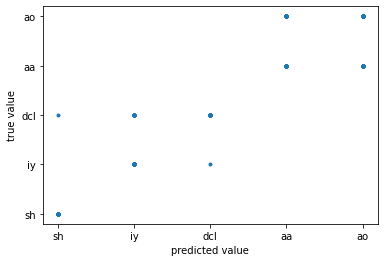

In [4]:
plt.xlabel('predicted value')
plt.ylabel('true value')
training = plt.scatter(lda_train_predictions, train_y, marker='.')


### 4. LDA on "aa", "ao"
Select the two phonemes "aa" and "ao". Fit an LDA model on this data set and repeat the steps
    done in (2).

full LDA training score:  0.9440119760479042
full LDA training error: ~6%
full LDA test score:  0.9195893926432849
full LDA test error: ~8.04%
aa/ao LDA training score:  0.8935837245696401
aa/ao LDA training error: ~11%
aa/ao LDA test score:  0.785876993166287
aa/ao LDA test error: ~21.41%


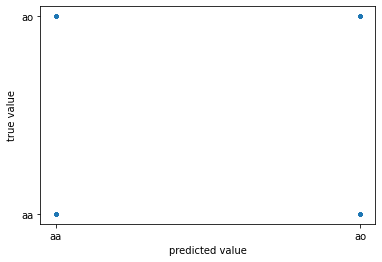

In [5]:
train_phones = [y for _, y in train.groupby(train['g'])]
new_train = pd.DataFrame()
new_train = new_train.append(train_phones[0])
new_train = new_train.append(train_phones[1])

test_phones = [y for _, y in test.groupby(test['g'])]
new_test = pd.DataFrame()
new_test = new_test.append(test_phones[0])
new_test = new_test.append(test_phones[1])

new_train_X = new_train.iloc[:, 0:-1]
new_train_y = new_train.iloc[:, -1]
new_test_X = new_test.iloc[:, 0:-1]
new_test_y = new_test.iloc[:, -1]

lda = LDA(n_components=1)
new_lda_train_fit = lda.fit_transform(new_train_X, new_train_y)
new_lda_test_predictions = lda.predict(new_test_X)

new_lda_train_predictions = lda.predict(new_train_X)

new_training = plt.scatter(new_lda_train_predictions, new_train_y, marker='.')
plt.xlabel('predicted value')
plt.ylabel('true value')

new_train_score = lda.score(new_train_X, new_train_y)
new_test_score = lda.score(new_test_X, new_test_y)

print("full LDA training score: ", lda_train_score)
print("full LDA training error: ~", round(100*(1 - lda_train_score)), "%", sep='')
print("full LDA test score: ", lda_test_score)
print("full LDA test error: ~", round(100*(1 - lda_test_score), 2), "%", sep='')
print("aa/ao LDA training score: ", new_train_score)
print("aa/ao LDA training error: ~", round(100*(1 - new_train_score)), "%", sep='')
print("aa/ao LDA test score: ", new_test_score)
print("aa/ao LDA test error: ~", round(100*(1 - new_test_score), 2), "%", sep='')

## 5. QDA
Repeat steps (b) and (d) using QDA and report your findings. Would you prefer LDA or QDA in this example? Why?

In [6]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

qda = QDA()
qda_train_fit = qda.fit(train_X, train_y)
qda_test_predictions = qda.predict(test_X)
qda_train_score = qda.score(train_X, train_y)
qda_test_score = qda.score(test_X, test_y)

qda = QDA()
new_qda_train_fit = qda.fit(new_train_X, new_train_y)
new_qda_test_predictions = qda.predict(new_test_X)
new_qda_train_score = qda.score(new_train_X, new_train_y)
new_qda_test_score = qda.score(new_test_X, new_test_y)

print("full QDA training score: ", qda_train_score)
print("full QDA training error: ~", round(100*(1 - qda_train_score)), "%", sep='')
print("full QDA test score: ", qda_test_score)
print("full QDA test error: ~", round(100*(1 - qda_test_score)), "%", sep='')
print("aa/ao QDA training score: ", new_qda_train_score)
print("aa/ao QDA training error: ~", round(100*(1 - new_qda_train_score)), "%", sep='')
print("aa/ao QDA test score: ", new_qda_test_score)
print("aa/ao QDA test error: ~", round(100*(1 - new_qda_test_score)), "%", sep='')
print("vs")
print("full LDA training score: ", lda_train_score)
print("full LDA training error: ~", round(100*(1 - lda_train_score)), "%", sep='')
print("full LDA test score: ", lda_test_score)
print("full LDA test error: ~", round(100*(1 - lda_test_score), 2), "%", sep='')
print("aa/ao LDA training score: ", new_train_score)
print("aa/ao LDA training error: ~", round(100*(1 - new_train_score)), "%", sep='')
print("aa/ao LDA test score: ", new_test_score)
print("aa/ao LDA test error: ~", round(100*(1 - new_test_score), 2), "%", sep='')

full QDA training score:  1.0
full QDA training error: ~0%
full QDA test score:  0.8417450812660393
full QDA test error: ~16%
aa/ao QDA training score:  1.0
aa/ao QDA training error: ~0%
aa/ao QDA test score:  0.6605922551252847
aa/ao QDA test error: ~34%
vs
full LDA training score:  0.9440119760479042
full LDA training error: ~6%
full LDA test score:  0.9195893926432849
full LDA test error: ~8.04%
aa/ao LDA training score:  0.8935837245696401
aa/ao LDA training error: ~11%
aa/ao LDA test score:  0.785876993166287
aa/ao LDA test error: ~21.41%


### LDA vs QDA discussion:

In both the full array, as well as the reduced aa/ao dataset, QDA outperformed LDA when predicting the training data, and underperformed LDA when predicting the test data. This suggests that QDA overfits, and introduces additional variance, resulting in higher error rate.

## 6. Confusion Matrices
Generate confusion matrices for the LDA and QDA model for "aa" and "ao". Which differences can you observe between the models?

In [7]:
from sklearn.metrics import confusion_matrix as cm

true_y = new_test_y
lda_predicted_y = new_lda_test_predictions
qda_predicted_y = new_qda_test_predictions

lda_confusion_matrix = cm(true_y, lda_predicted_y)
qda_confusion_matrix = cm(true_y, qda_predicted_y)

print("LDA confusion matrix: \n", lda_confusion_matrix)
print("QDA confusion matrix: \n", qda_confusion_matrix)

LDA confusion matrix: 
 [[121  55]
 [ 39 224]]
QDA confusion matrix: 
 [[ 29 147]
 [  2 261]]


For the LDA model, the false aos are roughly equal to the false aas in number, and proportional to the total ao / aa predictions. The LDA misclassifies roughly 1/4 of both its aa and ao predictions.

For the QDA model, the model vastly over-predicts ao, with roughly 1/3 misclassification of ao (and only a small increase in correctly predicted ao), and underpredicts aa, but with lower error (roughly 1/15 misclassification)